In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
wellsfargo = pd.read_excel("/content/final.xlsx")
#wellsfargo_test = pd.read_excel('/content/wellsfargo_test.xlsx')

In [ ]:
print(wellsfargo.shape) # get record and variable counts
print(wellsfargo.columns) # get variable names

(13491, 39)
Index(['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT',
       'WF_dvc_age', 'PWD_UPDT_TS', 'RGN_NAME', 'STATE_PRVNC_TXT',
       'ALERT_TRGR_CD', 'CUST_ZIP', 'CUST_STATE', 'PH_NUM_UPDT_TS',
       'CUST_SINCE_DT', 'TRAN_TS', 'TRAN_DT', 'ACTN_CD', 'ACTN_INTNL_TXT',
       'TRAN_TYPE_CD', 'ACTVY_DT', 'FRAUD_NONFRAUD', 'pwd_up_numeric',
       'ph_num_up_numeric', 'cst_since_numeric', 'Tran_TS_Numeric',
       'cst_diff_tran', 'phn_diff_tran', 'pwd_diff_tran',
       'Carrier_Popular Carrier', 'Carrier_Unknown Carrier', 'Device_MOBILE',
       'Device_NoDevice', 'Device_PHONE', 'Device_TABLET', 'auth_prim_AFA_PL',
       'auth_prim_FACE_ID', 'auth_prim_TOUCH_ID', 'auth_prim_UN_PWD',
       'auth_sec_CHALLENGE_ISSUED', 'auth_sec_CHALLENGE_SUCCESS'],
      dtype='object')


In [ ]:
#print(wellsfargo_test.shape) # get record and variable counts
#print(wellsfargo_test.columns)

In [ ]:
wellsfargo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   TRAN_AMT                    13491 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL     13491 non-null  float64       
 2   CUST_AGE                    13491 non-null  int64         
 3   OPEN_ACCT_CT                13491 non-null  int64         
 4   WF_dvc_age                  13491 non-null  int64         
 5   PWD_UPDT_TS                 13491 non-null  datetime64[ns]
 6   RGN_NAME                    11077 non-null  object        
 7   STATE_PRVNC_TXT             11077 non-null  object        
 8   ALERT_TRGR_CD               13491 non-null  int64         
 9   CUST_ZIP                    13491 non-null  int64         
 10  CUST_STATE                  13455 non-null  object        
 11  PH_NUM_UPDT_TS              13491 non-null  datetime64

In [ ]:
for i in range(len(wellsfargo['FRAUD_NONFRAUD'])):
  if wellsfargo.iloc[i,19] == 'Non-Fraud':
     wellsfargo.iloc[i,19] = 0 
  else:
     wellsfargo.iloc[i,19] = 1

In [ ]:
#from pandas.core.dtypes.dtypes import CategoricalDtype
wellsfargo['FRAUD_NONFRAUD']= pd.Categorical(wellsfargo.FRAUD_NONFRAUD)

In [ ]:
wellsfargo.Device_MOBILE =  pd.Categorical(wellsfargo.Device_MOBILE)
wellsfargo.Device_NoDevice = pd.Categorical(wellsfargo.Device_NoDevice)               
wellsfargo.Device_PHONE = pd.Categorical(wellsfargo.Device_PHONE)                  
wellsfargo.Device_TABLET = pd.Categorical(wellsfargo.Device_TABLET)                 
wellsfargo.auth_prim_AFA_PL = pd.Categorical(wellsfargo.auth_prim_AFA_PL)              
wellsfargo.auth_prim_FACE_ID  = pd.Categorical(wellsfargo.auth_prim_FACE_ID )            
wellsfargo.auth_prim_TOUCH_ID = pd.Categorical(wellsfargo.auth_prim_TOUCH_ID)            
wellsfargo.auth_prim_UN_PWD  = pd.Categorical(wellsfargo.auth_prim_UN_PWD)             
wellsfargo.auth_sec_CHALLENGE_ISSUED  = pd.Categorical(wellsfargo.auth_sec_CHALLENGE_ISSUED )    
wellsfargo.auth_sec_CHALLENGE_SUCCESS = pd.Categorical(wellsfargo.auth_sec_CHALLENGE_SUCCESS)    
wellsfargo['Carrier_Popular Carrier']   = pd.Categorical(wellsfargo['Carrier_Popular Carrier'])
wellsfargo['Carrier_Unknown Carrier']   = pd.Categorical(wellsfargo['Carrier_Unknown Carrier'])

In [ ]:
wellsfargo = wellsfargo[['TRAN_AMT','ACCT_PRE_TRAN_AVAIL_BAL','CUST_AGE','cst_diff_tran','phn_diff_tran','pwd_diff_tran','Device_MOBILE','Device_NoDevice','Device_PHONE','Device_TABLET','auth_prim_AFA_PL','auth_prim_FACE_ID','auth_prim_TOUCH_ID','auth_prim_UN_PWD','auth_sec_CHALLENGE_ISSUED','auth_sec_CHALLENGE_SUCCESS','Carrier_Popular Carrier','Carrier_Unknown Carrier','FRAUD_NONFRAUD']]

In [ ]:
wellsfargo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   TRAN_AMT                    13491 non-null  float64 
 1   ACCT_PRE_TRAN_AVAIL_BAL     13491 non-null  float64 
 2   CUST_AGE                    13491 non-null  int64   
 3   cst_diff_tran               13491 non-null  int64   
 4   phn_diff_tran               13491 non-null  int64   
 5   pwd_diff_tran               13491 non-null  int64   
 6   Device_MOBILE               13491 non-null  category
 7   Device_NoDevice             13491 non-null  category
 8   Device_PHONE                13491 non-null  category
 9   Device_TABLET               13491 non-null  category
 10  auth_prim_AFA_PL            13491 non-null  category
 11  auth_prim_FACE_ID           13491 non-null  category
 12  auth_prim_TOUCH_ID          13491 non-null  category
 13  auth_prim_UN_PWD

In [ ]:
X = wellsfargo.iloc[:,:18]
y = wellsfargo.iloc[:, 18]


In [ ]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200, max_samples=100, random_state=42)
rnd_clf.fit(X_train, y_train)


print(rnd_clf.score(X_test, y_test))

0.933308632826973


In [ ]:
from  sklearn.metrics import f1_score
y1 = rnd_clf.predict(X_test)
f1_score(y_test,y1)

0.8652694610778444

In [ ]:
from sklearn.metrics import f1_score
y_test_predicted= rnd_clf.predict(X_test)
a = f1_score(y_test,y_test_predicted)
print(a)
#precision and recall
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_predicted))
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_predicted))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_predicted))

0.8652694610778444
0.8947368421052632
0.8376811594202899
0.933308632826973


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_predicted)

array([[1941,   68],
       [ 112,  578]])

In [ ]:
tn, fp, fn, tp =confusion_matrix(y_test,y_test_predicted).ravel()
print("TN",tn,"FP",fp,"FN",fn,"TP",tp)

TN 1941 FP 68 FN 112 TP 578


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
dt.fit(X_train, y_train)
dt.score(X_test, y_test), dt.score(X_train, y_train)

(0.9251574657280475, 1.0)

In [ ]:
from sklearn.metrics import f1_score
y_test_predicted= dt.predict(X_test)
a = f1_score(y_test,y_test_predicted)
print(a)
#precision and recall
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_predicted))
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_predicted))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_predicted))

0.8555078683834049
0.844632768361582
0.8666666666666667
0.9251574657280475


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_predicted)

array([[1899,  110],
       [  92,  598]])

In [ ]:
tn, fp, fn, tp =confusion_matrix(y_test,y_test_predicted).ravel()
print("TN",tn,"FP",fp,"FN",fn,"TP",tp)

TN 1899 FP 110 FN 92 TP 598


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Define base model
naive_dt = DecisionTreeClassifier(max_depth=1)

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=200, learning_rate=0.5,
    random_state=42)

ada_clf.fit(X_train, y_train)

# Performance
print(ada_clf.score(X_test, y_test))

0.9514635050018525


In [ ]:
from sklearn.metrics import f1_score
y_test_predicted= ada_clf.predict(X_test)
a = f1_score(y_test,y_test_predicted)
print(a)
#precision and recall
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_predicted))
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_predicted))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_predicted))

0.9043097151205258
0.9116347569955817
0.8971014492753623
0.9514635050018525


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_predicted)

array([[1949,   60],
       [  71,  619]])

In [ ]:
tn, fp, fn, tp =confusion_matrix(y_test,y_test_predicted).ravel()
print("TN",tn,"FP",fp,"FN",fn,"TP",tp)

TN 1949 FP 60 FN 71 TP 619


In [ ]:
from  sklearn.metrics import f1_score
y1 = ada_clf.predict(X_test)
f1_score(y_test,y1)

0.9043097151205258

In [ ]:
# performing preprocessing part
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#sc = StandardScaler()
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_train[:5,:]

array([[ 0.12554513,  1.22758159, -0.28378751,  0.08043803, -0.73273652,
         0.08238309,  0.01351184,  0.42968147,  0.01422468,  0.05102499],
       [ 0.13880998, -0.19002297, -0.3579291 ,  0.79567058, -0.07433216,
         0.0251919 , -0.37567074, -0.19071241,  0.00359437, -0.20893991],
       [-0.56170476,  0.16420049, -0.48729433,  0.38026063, -0.03680974,
        -0.04148803,  0.04677852, -0.18960176,  0.01786687, -0.0562959 ],
       [-0.22734924,  0.75953083,  0.60479777,  0.01893375,  0.01660999,
         0.96559552,  0.20640814, -0.05295328, -0.64091908, -0.08460903],
       [ 1.20991084, -0.06947443,  0.62704688, -0.19937051,  0.82770276,
         0.14728885,  0.57013152,  0.17653165,  0.69986355, -0.0943209 ]])

In [ ]:
#99% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_train)
reduced = pca.transform(X_train)

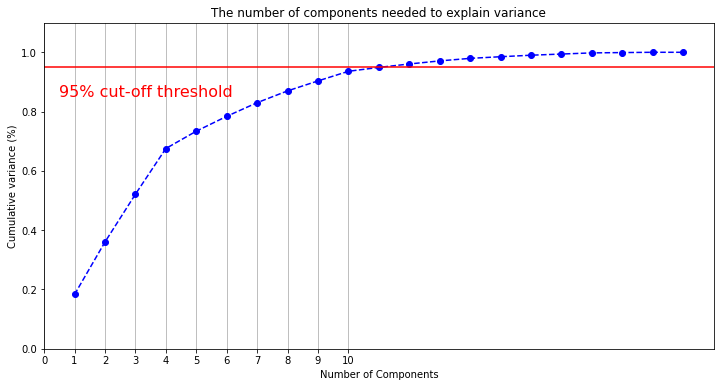

In [ ]:
pca = PCA().fit(X_train)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 10)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(solver="liblinear",penalty='l2',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [ ]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 269  421]
 [ 126 1883]]


In [ ]:
classifier.score(X_train,y_train)

0.7676056338028169

In [ ]:
classifier.score(X_test,y_test)

0.797332345313079

In [ ]:

#1) SVM LinearLocator ( SCALING)
#2) LOGISTIC POLYNOMIAL var
#3) NAIVE BAYES
#4) 


In [ ]:
" Check from here "

In [ ]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 22 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=f2b3271f1e09fada7d29b9a526dad8217ead4acf873576b32c2abf604b697b49
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp34gaadn_
  JVM stdout: /tmp/tmp34gaadn_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp34gaadn_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_bvzl8r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
X_train["target"] = y_train

In [ ]:
train = h2o.import_file("/content/h2o_final_1.csv", header=1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train

TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,cst_diff_tran,phn_diff_tran,pwd_diff_tran,Device_MOBILE,Device_NoDevice,Device_PHONE,Device_TABLET,auth_prim_AFA_PL,auth_prim_FACE_ID,auth_prim_TOUCH_ID,auth_prim_UN_PWD,auth_sec_CHALLENGE_ISSUED,auth_sec_CHALLENGE_SUCCESS,Carrier_Popular Carrier,Carrier_Unknown Carrier,target
30.81,1112.22,0,9.25565e+08,7.39112e+07,4.48272e+07,1,0,0,0,0,1,0,0,0,0,0,1,0
58.65,2955.89,0,0,6.1575e+07,1.5787e+07,0,0,0,0,0,0,0,1,0,0,1,0,1
30.29,0,0,8.79372e+08,8.79372e+08,2.07321e+06,1,0,0,0,0,0,0,1,0,0,1,0,0
59.64,875.37,1,9.73578e+08,4.70645e+07,8.9064e+06,1,0,0,0,1,0,0,0,0,0,0,1,0
9.84,11399.8,1,7.03084e+08,2.3628e+07,3.0924e+06,0,1,0,0,0,0,1,0,0,0,0,0,0
491.29,2678.9,1,1.7811e+09,5.44855e+07,5.1498e+07,1,0,0,0,0,0,0,1,0,0,1,0,1
1.48,0,1,6.38539e+08,6.38539e+08,6.51168e+07,1,0,0,0,0,0,0,1,0,0,1,0,0
500.88,458.31,1,1.34054e+09,1.34054e+09,1.30003e+08,0,0,0,0,0,0,0,1,0,0,1,0,0
493.14,24933,1,7.19066e+08,3.05887e+07,-2.4768e+06,0,1,0,0,0,0,0,1,0,0,0,0,1
492.68,3708.6,0,1.15894e+09,1.15894e+09,9.3186e+07,0,1,0,0,0,0,0,1,0,0,0,1,1


In [ ]:
x = train.columns
y = "target"
x.remove(y)

In [ ]:
train["target"] = train["target"].asfactor()

In [ ]:
aml = H2OAutoML(max_models=200, seed=42, max_runtime_secs=500)

In [ ]:
print(x, y)

['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'cst_diff_tran', 'phn_diff_tran', 'pwd_diff_tran', 'Device_MOBILE', 'Device_NoDevice', 'Device_PHONE', 'Device_TABLET', 'auth_prim_AFA_PL', 'auth_prim_FACE_ID', 'auth_prim_TOUCH_ID', 'auth_prim_UN_PWD', 'auth_sec_CHALLENGE_ISSUED', 'auth_sec_CHALLENGE_SUCCESS', 'Carrier_Popular Carrier', 'Carrier_Unknown Carrier'] target


In [ ]:
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_1_20220425_62206


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,99.0,99.0,81225.0,10.0,15.0,14.181818,38.0,69.0,60.232323




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.01742209180230431
RMSE: 0.13199277178051952
LogLoss: 0.06653837435064643
Mean Per-Class Error: 0.027321777795588455
AUC: 0.9977273074933464
AUCPR: 0.9942906102941382
Gini: 0.9954546149866927

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4853253400626566: 


,,0,1,Error,Rate
0,0,7724.0,103.0,0.0132,(103.0/7827.0)
1,1,123.0,2842.0,0.0415,(123.0/2965.0)
2,Total,7847.0,2945.0,0.0209,(226.0/10792.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.485325,0.961760,194.0
1,max f2,0.253141,0.971309,256.0
2,max f0point5,0.638747,0.968540,156.0
3,max accuracy,0.485325,0.979059,194.0
4,max precision,0.999133,1.000000,0.0
5,max recall,0.042019,1.000000,346.0
6,max specificity,0.999133,1.000000,0.0
7,max absolute_mcc,0.485325,0.947351,194.0
8,max min_per_class_accuracy,0.349666,0.975853,231.0
9,max mean_per_class_accuracy,0.340250,0.976564,233.0



Gains/Lift Table: Avg response rate: 27.47 %, avg score: 27.50 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.998909,3.639798,3.639798,1.000000,0.999154,1.000000,0.999154,0.036425,0.036425,263.979764,263.979764,0.036425
1,2,0.020015,0.998495,3.639798,3.639798,1.000000,0.998711,1.000000,0.998932,0.036425,0.072850,263.979764,263.979764,0.072850
2,3,0.030022,0.998050,3.639798,3.639798,1.000000,0.998271,1.000000,0.998712,0.036425,0.109275,263.979764,263.979764,0.109275
3,4,0.040030,0.997555,3.639798,3.639798,1.000000,0.997796,1.000000,0.998483,0.036425,0.145700,263.979764,263.979764,0.145700
4,5,0.050037,0.996985,3.639798,3.639798,1.000000,0.997289,1.000000,0.998244,0.036425,0.182125,263.979764,263.979764,0.182125
5,6,0.100074,0.991892,3.639798,3.639798,1.000000,0.994706,1.000000,0.996475,0.182125,0.364250,263.979764,263.979764,0.364250
6,7,0.150019,0.977132,3.639798,3.639798,1.000000,0.985772,1.000000,0.992912,0.181788,0.546037,263.979764,263.979764,0.546037
7,8,0.200056,0.927203,3.626317,3.636426,0.996296,0.956780,0.999074,0.983875,0.181450,0.727487,262.631691,263.642590,0.727232
8,9,0.300037,0.223147,2.600819,3.291330,0.714551,0.653319,0.904262,0.873723,0.260034,0.987521,160.081926,229.133029,0.947915
9,10,0.400019,0.036979,0.124812,2.499884,0.034291,0.094837,0.686820,0.679047,0.012479,1.000000,-87.518766,149.988418,0.827265




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.03419064844299245
RMSE: 0.1849071346459959
LogLoss: 0.11937988045786113
Mean Per-Class Error: 0.05570411670071881
AUC: 0.9882276531856369
AUCPR: 0.9743234927205089
Gini: 0.9764553063712738

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4337770694560846: 


,,0,1,Error,Rate
0,0,7578.0,249.0,0.0318,(249.0/7827.0)
1,1,236.0,2729.0,0.0796,(236.0/2965.0)
2,Total,7814.0,2978.0,0.0449,(485.0/10792.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.433777,0.918391,202.0
1,max f2,0.239936,0.932989,254.0
2,max f0point5,0.745618,0.937244,126.0
3,max accuracy,0.452780,0.955059,198.0
4,max precision,0.999293,1.000000,0.0
5,max recall,0.002297,1.000000,392.0
6,max specificity,0.999293,1.000000,0.0
7,max absolute_mcc,0.433777,0.887387,202.0
8,max min_per_class_accuracy,0.258959,0.947386,249.0
9,max mean_per_class_accuracy,0.239936,0.948125,254.0



Gains/Lift Table: Avg response rate: 27.47 %, avg score: 27.43 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.998868,3.639798,3.639798,1.000000,0.999226,1.000000,0.999226,0.036425,0.036425,263.979764,263.979764,0.036425
1,2,0.020015,0.998415,3.639798,3.639798,1.000000,0.998662,1.000000,0.998944,0.036425,0.072850,263.979764,263.979764,0.072850
2,3,0.030022,0.997857,3.639798,3.639798,1.000000,0.998144,1.000000,0.998677,0.036425,0.109275,263.979764,263.979764,0.109275
3,4,0.040030,0.997316,3.639798,3.639798,1.000000,0.997581,1.000000,0.998403,0.036425,0.145700,263.979764,263.979764,0.145700
4,5,0.050037,0.996590,3.639798,3.639798,1.000000,0.996995,1.000000,0.998122,0.036425,0.182125,263.979764,263.979764,0.182125
5,6,0.100074,0.991041,3.639798,3.639798,1.000000,0.994204,1.000000,0.996163,0.182125,0.364250,263.979764,263.979764,0.364250
6,7,0.150019,0.973728,3.599280,3.626309,0.988868,0.984128,0.996294,0.992156,0.179764,0.544013,259.928041,262.630858,0.543247
7,8,0.200056,0.911423,3.451067,3.582478,0.948148,0.950004,0.984252,0.981613,0.172681,0.716695,245.106739,258.247799,0.712351
8,9,0.300037,0.240350,2.330955,3.165432,0.640408,0.636983,0.869673,0.866772,0.233052,0.949747,133.095474,216.543241,0.895831
9,10,0.400019,0.041602,0.360944,2.464473,0.099166,0.106682,0.677091,0.676794,0.036088,0.985835,-63.905621,146.447267,0.807733




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.956078,0.003318,0.955998,0.957851,0.953661,0.960612,0.952271
1,auc,0.988106,0.001057,0.988103,0.989009,0.986899,0.989296,0.987223
2,err,0.043922,0.003318,0.044002,0.042149,0.046339,0.039388,0.047729
3,err_count,94.800000,7.155417,95.000000,91.000000,100.000000,85.000000,103.000000
4,f0point5,0.924887,0.006243,0.929060,0.917621,0.921683,0.933309,0.922763
5,f1,0.919019,0.008430,0.923201,0.926908,0.915110,0.923767,0.906108
6,f2,0.913378,0.016686,0.917416,0.936384,0.908631,0.914418,0.890043
7,lift_top_group,3.645690,0.163563,3.454400,3.527778,3.620805,3.805996,3.819469
8,logloss,0.119982,0.005133,0.121334,0.117174,0.122329,0.112837,0.126238
9,max_per_class_error,0.090258,0.022612,0.086400,0.057190,0.095638,0.091711,0.120354



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-04-25 06:23:04,28.684 sec,0.0,0.446383,0.587917,0.500000,0.274741,1.000000,0.725259
1,,2022-04-25 06:23:04,29.226 sec,5.0,0.322149,0.363276,0.983584,0.964037,3.639798,0.054855
2,,2022-04-25 06:23:04,29.518 sec,10.0,0.261027,0.268612,0.985485,0.968443,3.639798,0.052076
3,,2022-04-25 06:23:05,29.812 sec,15.0,0.224738,0.209962,0.987227,0.971446,3.639798,0.049944
4,,2022-04-25 06:23:05,30.113 sec,20.0,0.206513,0.176621,0.988091,0.973221,3.639798,0.047628
5,,2022-04-25 06:23:05,30.368 sec,25.0,0.194845,0.153260,0.989146,0.975298,3.639798,0.046053
6,,2022-04-25 06:23:05,30.580 sec,30.0,0.186375,0.136945,0.990393,0.977962,3.639798,0.042161
7,,2022-04-25 06:23:06,30.863 sec,35.0,0.179958,0.124996,0.991407,0.980108,3.639798,0.040308
8,,2022-04-25 06:23:06,31.080 sec,40.0,0.175276,0.116923,0.992189,0.981805,3.639798,0.038454
9,,2022-04-25 06:23:06,31.247 sec,45.0,0.170827,0.109905,0.992933,0.983342,3.639798,0.036972



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TRAN_AMT,5811.541016,1.000000,0.655339
1,ACCT_PRE_TRAN_AVAIL_BAL,915.850342,0.157592,0.103276
2,Carrier_Popular Carrier,873.003723,0.150219,0.098444
3,Carrier_Unknown Carrier,448.296844,0.077139,0.050552
4,pwd_diff_tran,313.288452,0.053908,0.035328
5,phn_diff_tran,190.730316,0.032819,0.021508
6,Device_MOBILE,173.330429,0.029825,0.019546
7,cst_diff_tran,60.530964,0.010416,0.006826
8,auth_prim_UN_PWD,32.399010,0.005575,0.003653
9,CUST_AGE,24.890289,0.004283,0.002807


In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20220425_62206,0.988228,0.11938,0.974323,0.0557041,0.184907,0.0341906
GBM_5_AutoML_1_20220425_62206,0.988191,0.120801,0.973944,0.0560517,0.185974,0.0345863
GBM_3_AutoML_1_20220425_62206,0.987977,0.121965,0.97365,0.0547078,0.186859,0.0349164
GBM_2_AutoML_1_20220425_62206,0.987886,0.122183,0.973623,0.0559545,0.187038,0.0349832
XGBoost_grid_1_AutoML_1_20220425_62206_model_21,0.98785,0.122128,0.973133,0.067388,0.187874,0.0352966
XGBoost_grid_1_AutoML_1_20220425_62206_model_13,0.98782,0.12328,0.972908,0.0638903,0.188262,0.0354425
XGBoost_3_AutoML_1_20220425_62206,0.98775,0.123703,0.972622,0.062761,0.189344,0.035851
XGBoost_grid_1_AutoML_1_20220425_62206_model_14,0.987571,0.122612,0.973118,0.0616905,0.187607,0.0351963
XGBoost_grid_1_AutoML_1_20220425_62206_model_20,0.98755,0.122513,0.973245,0.0628555,0.187291,0.0350781
GBM_4_AutoML_1_20220425_62206,0.987506,0.124013,0.972968,0.0586118,0.188349,0.0354754


In [ ]:
model_path = h2o.save_model(model=aml.leader, path=".")

In [ ]:
saved_model = h2o.load_model(model_path)

In [ ]:
X_test.to_csv("/content/Xtest.csv", index=False)

In [ ]:
test = h2o.import_file("/content/Xtest.csv", header=1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
saved_model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.95368,0.0463196
0,0.999827,0.000173311
0,0.99988,0.000119858
1,0.388171,0.611829
1,0.0559029,0.944097
0,0.999855,0.000144777
1,0.133976,0.866024
0,0.989866,0.0101337
0,0.999215,0.000784848
0,0.998903,0.00109686


In [ ]:
y_pred = list(saved_model.predict(test)["predict"])

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = y_pred[0].as_data_frame()["predict"].tolist()

In [ ]:
from sklearn.metrics import f1_score
f1_score(list(y_test), y_pred)

0.9005083514887436

In [ ]:
#precision and recall
from sklearn.metrics import precision_score
print(precision_score(list(y_test), y_pred))
from sklearn.metrics import recall_score
print(recall_score(list(y_test), y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(list(y_test), y_pred))

0.9024745269286754
0.8985507246376812
0.9492404594294183


In [ ]:
tn, fp, fn, tp =confusion_matrix(y_test,y_pred).ravel()
print("TN",tn,"FP",fp,"FN",fn,"TP",tp)

TN 1942 FP 67 FN 70 TP 620


In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.7447202667654687

In [ ]:
from sklearn.metrics import f1_score
y_test_predicted= model1.predict(X_test)
a = f1_score(y_test,y_test_predicted)
print(a)
#precision and recall
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_predicted))
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_predicted))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_predicted))

0.008633093525179856
0.6
0.004347826086956522
0.7447202667654687


In [ ]:
tn, fp, fn, tp =confusion_matrix(y_test,y_test_predicted).ravel()
print("TN",tn,"FP",fp,"FN",fn,"TP",tp)

TN 2007 FP 2 FN 687 TP 3
